In [44]:
#import libraries needed 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from scipy.stats import lognorm, norm, beta

import plotly.express as px
import plotly.graph_objects as go

In [45]:
# input parameters 

#Area=  #Distribution Type=LOG_NORMAL Mean: 800 acres Std. Dev: 0.2
#Thickness= #Distribution Type=LOG_NORMAL Mean: 80 ft Std. Dev: 0.16
#Porosity=  #Distribution Type=NORMAL Mean: 0.22 Std. Dev: 0.0271
#So=    #Distribution Type=BETA Alpha : 0.151 Beta : 0.071 lower bound: 0.35 upper bound: 0.82
#oil_FVF=#  Distribution Type=constant 1.22 rb/stb
#Recovery_Factor=   #Distribution Type=NORMAL Mean: 24% St. Dev.: 6.25%


In [46]:
# Area 
Area = np.random.lognormal(np.log(800),0.2,1000)
print(f"Area={Area[:5]}")

#Thickness
Thickness= np.random.lognormal(np.log(80),0.16,1000)
print(f"Thickness={Thickness[:5]}")

#Porosity
Porosity=np.random.normal(0.22,0.0271,1000)
print(f"Porosity={Porosity[:5]}")

#So
def beta_distribution_with_bounds(size, alpha, beta, lower_bound, upper_bound):
    # Generate random numbers from standard beta distribution
    standard_beta = np.random.beta(alpha, beta, size)

    # Transform to the desired range [lower_bound, upper_bound]
    result= lower_bound + (upper_bound - lower_bound) * standard_beta
    return result

So=beta_distribution_with_bounds(1000,0.151,0.071,0.35,0.82)
print(f"So={So[:5]}")

#oil_FVF
Oil_FVF = np.full(1000, 3.2)
print(f"Oil_FVF={Oil_FVF[:5]}")

#Recovery_Factor
Recovery_Factor=np.random.normal(0.24,0.0625,1000)
print(f"Recovery_Factor={Recovery_Factor[:5]}")

Area=[702.51094957 687.81671733 886.04093423 961.30167396 717.0186444 ]
Thickness=[74.84017072 53.6169901  93.46257483 81.51806462 70.68996003]
Porosity=[0.18801108 0.20551669 0.20691598 0.22383849 0.19591825]
So=[0.81995169 0.82       0.36550916 0.81999999 0.81378306]
Oil_FVF=[3.2 3.2 3.2 3.2 3.2]
Recovery_Factor=[0.32158285 0.21586101 0.2179929  0.33137475 0.18065926]


In [47]:
#Resources and Reserve 
Resources=(7758*Area*Thickness*Porosity*So)/Oil_FVF
print(f"Resources={Resources[:5]}")

Reserve=Resources*Recovery_Factor
print(f"Reserve={Reserve[:5]}")


Resources=[19649856.32305082 15067316.01160568 15183909.87246625 34870804.50026082
 19591672.61773903]
Reserve=[ 6319056.77579706  3252445.99580858  3309984.51400656 11555304.05915859
  3539417.13894013]


In [48]:
data = {
    'Area': Area,
    'Thickness': Thickness,
    'Porosity': Porosity,
    'So': So,
    'Oil_FVF': Oil_FVF,
    'Recovery_Factor': Recovery_Factor,
    'Resources': Resources,
    'Reserve': Reserve
}

Data_frame = pd.DataFrame(data)
Data_frame

,Area,Thickness,Porosity,So,Oil_FVF,Recovery_Factor,Resources,Reserve
0,702.510950,74.840171,0.188011,0.819952,3.2,0.321583,1.964986e+07,6.319057e+06
1,687.816717,53.616990,0.205517,0.820000,3.2,0.215861,1.506732e+07,3.252446e+06
2,886.040934,93.462575,0.206916,0.365509,3.2,0.217993,1.518391e+07,3.309985e+06
3,961.301674,81.518065,0.223838,0.820000,3.2,0.331375,3.487080e+07,1.155530e+07
4,717.018644,70.689960,0.195918,0.813783,3.2,0.180659,1.959167e+07,3.539417e+06
...,...,...,...,...,...,...,...,...
995,538.978714,74.997641,0.232096,0.798152,3.2,0.140147,1.815399e+07,2.544219e+06
996,589.777556,67.642640,0.262552,0.820000,3.2,0.192904,2.082270e+07,4.016774e+06
997,855.184686,85.831262,0.201865,0.818837,3.2,0.332482,2.941460e+07,9.779839e+06
998,816.307872,95.110743,0.210550,0.819975,3.2,0.266581,3.249663e+07,8.662995e+06


In [49]:
# Find the minimum values for the entire DataFrame
min_values_df = Data_frame.min()

# Find the minimum values for specific columns
min_values_area = Data_frame['Area'].min()
min_values_thickness = Data_frame['Thickness'].min()

# Print the results
print("Minimum values for the entire DataFrame:")
print(min_values_df)
#convert results to numpy array 
min_df_array=np.array(min_values_df)
min_df_array


Minimum values for the entire DataFrame:
Area               4.211127e+02
Thickness          5.185042e+01
Porosity           1.303865e-01
So                 3.500000e-01
Oil_FVF            3.200000e+00
Recovery_Factor    4.196190e-02
Resources          4.282059e+06
Reserve            7.976656e+05
dtype: float64


array([4.21112704e+02, 5.18504190e+01, 1.30386527e-01, 3.50000000e-01,
       3.20000000e+00, 4.19618981e-02, 4.28205911e+06, 7.97665596e+05])

In [50]:
# Find the Maximum values for the entire DataFrame
max_values_df = Data_frame.max()

# Find the minimum values for specific columns
max_values_area = Data_frame['Area'].max()
max_values_thickness = Data_frame['Thickness'].max()

# Print the results
print("Maximum values for the entire DataFrame:")
print(max_values_df)
#convert results to numpy array 
max_df_array=np.array(max_values_df)
max_df_array


Maximum values for the entire DataFrame:
Area               1.454753e+03
Thickness          1.366822e+02
Porosity           2.973533e-01
So                 8.200000e-01
Oil_FVF            3.200000e+00
Recovery_Factor    4.422701e-01
Resources          7.214520e+07
Reserve            1.840792e+07
dtype: float64


array([1.45475291e+03, 1.36682233e+02, 2.97353311e-01, 8.20000000e-01,
       3.20000000e+00, 4.42270101e-01, 7.21452036e+07, 1.84079232e+07])

In [51]:

# Specify parameters
max_Reserve = Data_frame['Reserve'].max()
min_Reserve = Data_frame['Reserve'].min()
number_bins = 100
Increment = (max_Reserve - min_Reserve) / number_bins

# Create frequency distribution using numpy.histogram
hist, bin_edges = np.histogram(Data_frame['Reserve'], bins=np.arange(min_Reserve, max_Reserve + Increment, Increment))

# Print the results
print("Frequency Distribution:")
print(hist)
print("\nBin Edges:")
print(bin_edges)

Frequency Distribution:
[ 2  4  3  4  7 17 13 16 19 31 23 17 26 31 21 26 27 21 24 30 24 26 33 24
 22 30 14 20 17 21 21 15 22 26 25 15 16 25 14 18 17  8 16 11 13 16 12 10
 16  4  8  7  3  5  5  3  5  4  3  1  7  3  4  3  2  2  4  1  2  0  1  1
  0  1  0  0  2  2  2  0  0  0  0  1  1  0  0  0  0  0  1  0  0  0  1  0
  1  0  0  0  1]

Bin Edges:
[  797665.59649028   973768.17233274  1149870.7481752   1325973.32401766
  1502075.89986012  1678178.47570258  1854281.05154504  2030383.6273875
  2206486.20322996  2382588.77907242  2558691.35491488  2734793.93075734
  2910896.5065998   3086999.08244227  3263101.65828473  3439204.23412719
  3615306.80996965  3791409.38581211  3967511.96165457  4143614.53749703
  4319717.11333949  4495819.68918195  4671922.26502441  4848024.84086687
  5024127.41670933  5200229.99255179  5376332.56839425  5552435.14423671
  5728537.72007917  5904640.29592163  6080742.8717641   6256845.44760656
  6432948.02344902  6609050.59929148  6785153.17513394  6961255.7509764


In [52]:
# Calculate cumulative frequency
cumulative_freq = np.cumsum(hist)
CDF=cumulative_freq/1000
_1CDF=1-CDF
_1CDF

array([0.998, 0.994, 0.991, 0.987, 0.98 , 0.963, 0.95 , 0.934, 0.915,
       0.884, 0.861, 0.844, 0.818, 0.787, 0.766, 0.74 , 0.713, 0.692,
       0.668, 0.638, 0.614, 0.588, 0.555, 0.531, 0.509, 0.479, 0.465,
       0.445, 0.428, 0.407, 0.386, 0.371, 0.349, 0.323, 0.298, 0.283,
       0.267, 0.242, 0.228, 0.21 , 0.193, 0.185, 0.169, 0.158, 0.145,
       0.129, 0.117, 0.107, 0.091, 0.087, 0.079, 0.072, 0.069, 0.064,
       0.059, 0.056, 0.051, 0.047, 0.044, 0.043, 0.036, 0.033, 0.029,
       0.026, 0.024, 0.022, 0.018, 0.017, 0.015, 0.015, 0.014, 0.013,
       0.013, 0.012, 0.012, 0.012, 0.01 , 0.008, 0.006, 0.006, 0.006,
       0.006, 0.006, 0.005, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004,
       0.003, 0.003, 0.003, 0.003, 0.002, 0.002, 0.001, 0.001, 0.001,
       0.001, 0.   ])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


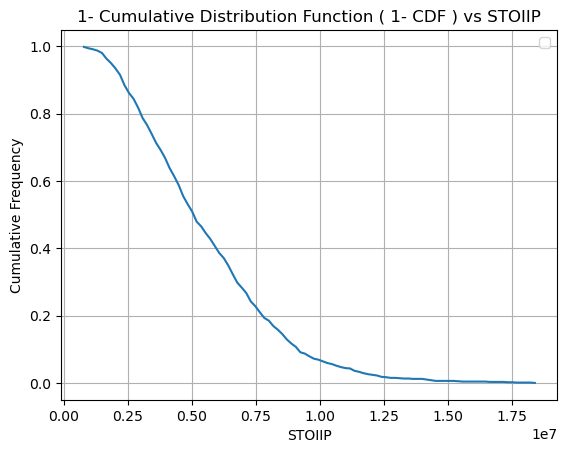

In [53]:
plt.plot(bin_edges[:-1], _1CDF, label='_1CDF')
plt.xlabel('STOIIP')
plt.ylabel('Cumulative Frequency')
plt.title('1- Cumulative Distribution Function ( 1- CDF ) vs STOIIP')
plt.legend()
plt.grid(True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


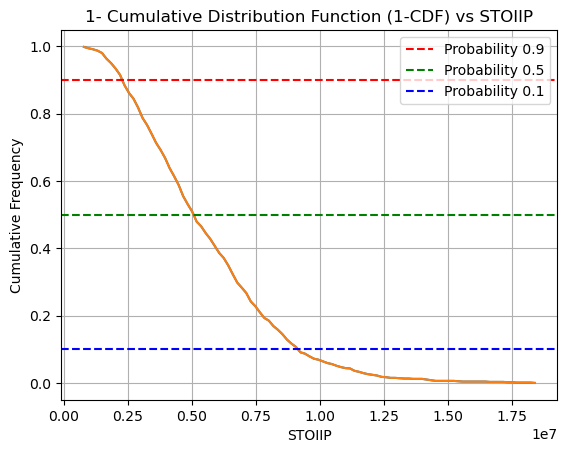

In [54]:
plt.plot(bin_edges[:-1], _1CDF, label='_1CDF')

# Your existing code
plt.plot(bin_edges[:-1], _1CDF, label='_1CDF')
plt.xlabel('STOIIP')
plt.ylabel('Cumulative Frequency')
plt.title('1- Cumulative Distribution Function (1-CDF) vs STOIIP')
plt.legend()
plt.grid(True)

# Adding horizontal lines for probabilities 0.9, 0.5, and 0.1
plt.axhline(0.9, color='r', linestyle='--', label='Probability 0.9')
plt.axhline(0.5, color='g', linestyle='--', label='Probability 0.5')
plt.axhline(0.1, color='b', linestyle='--', label='Probability 0.1')

plt.legend()

# Display the plot
plt.show()

In [61]:


# Create a figure using plotly
fig = go.Figure()

# Plot the _1CDF line
fig.add_trace(go.Scatter(x=bin_edges[:-1], y=_1CDF, mode='lines', name='1-CDF vs STOIIP'))

# Adding horizontal lines for probabilities 0.9, 0.5, and 0.1
fig.add_shape(dict(type="line", x0=min(bin_edges[:-1]), x1=max(bin_edges[:-1]), y0=0.9, y1=0.9, line=dict(color="red", dash="dash"), name='Probability 0.9'))
fig.add_shape(dict(type="line", x0=min(bin_edges[:-1]), x1=max(bin_edges[:-1]), y0=0.5, y1=0.5, line=dict(color="green", dash="dash"), name='Probability 0.5'))
fig.add_shape(dict(type="line", x0=min(bin_edges[:-1]), x1=max(bin_edges[:-1]), y0=0.1, y1=0.1, line=dict(color="blue", dash="dash"), name='Probability 0.1'))

# Update layout
fig.update_layout(
    xaxis=dict(title='STOIIP'),
    yaxis=dict(title='Cumulative Frequency'),
    title='1- Cumulative Distribution Function (1-CDF) vs STOIIP',
    showlegend=True,
    legend=dict(x=0, y=1, traceorder='normal', orientation='h'),
)

# Show the interactive plot
fig.show()